### IMPORTING THE LIBRARIES

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### UPLOADING THE DATASET

In [3]:
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
nullcount = print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
BP = df["BloodPressure"].mean()
ST = df["SkinThickness"].mean()
BMIM = df["BMI"].mean()

df['BloodPressure'] = df['BloodPressure'].replace(0, BP)
df['SkinThickness'] = df['SkinThickness'].replace(0, ST)
df['BMI'] = df['BMI'].replace(0, BMIM)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


<Axes: >

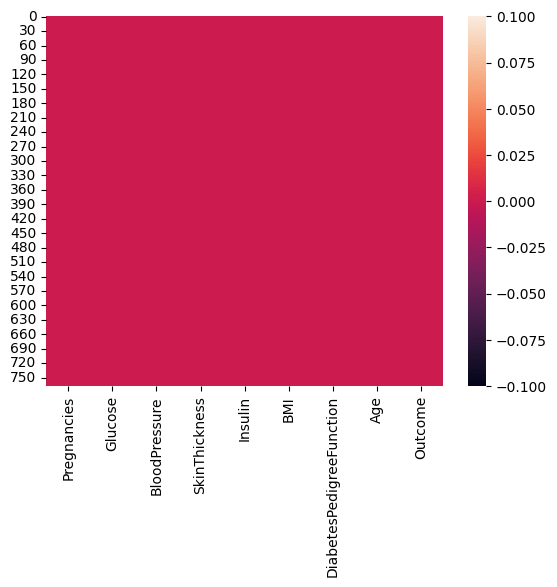

In [7]:
#checking for missing values
sns.heatmap(df.isnull())

In [8]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
# The distribution of the Outcome variable
df["Outcome"].value_counts()*100/len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [10]:
df.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [11]:
df.groupby("Outcome").agg({"Age":"max"})

,Age
Outcome,
0,81
1,70


In [12]:
df.groupby("Outcome").agg({"Insulin": "mean"})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [13]:
df.groupby("Outcome").agg({"Insulin": "max"})

,Insulin
Outcome,
0,744
1,846


In [14]:
df.groupby("Outcome").agg({"Glucose": "mean"})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [15]:
df.groupby("Outcome").agg({"Glucose": "max"})

,Glucose
Outcome,
0,197
1,199


In [16]:
df.groupby("Outcome").agg({"BMI": "mean"})

,BMI
Outcome,
0,30.880066
1,35.381288


### DATA PREPROCESSING

In [17]:
#Checking for duplicate values
df.duplicated().sum()

0

In [18]:
(df[df.columns] == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [19]:
# Replacing 0 values with mean
for i in ["Glucose","BMI","Insulin","BloodPressure"]:
    df[i].replace({0:df[i].mean()},inplace = True)

In [20]:
# checking again for 0 values
(df[df.columns] == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

### DATA VISUALIZATION

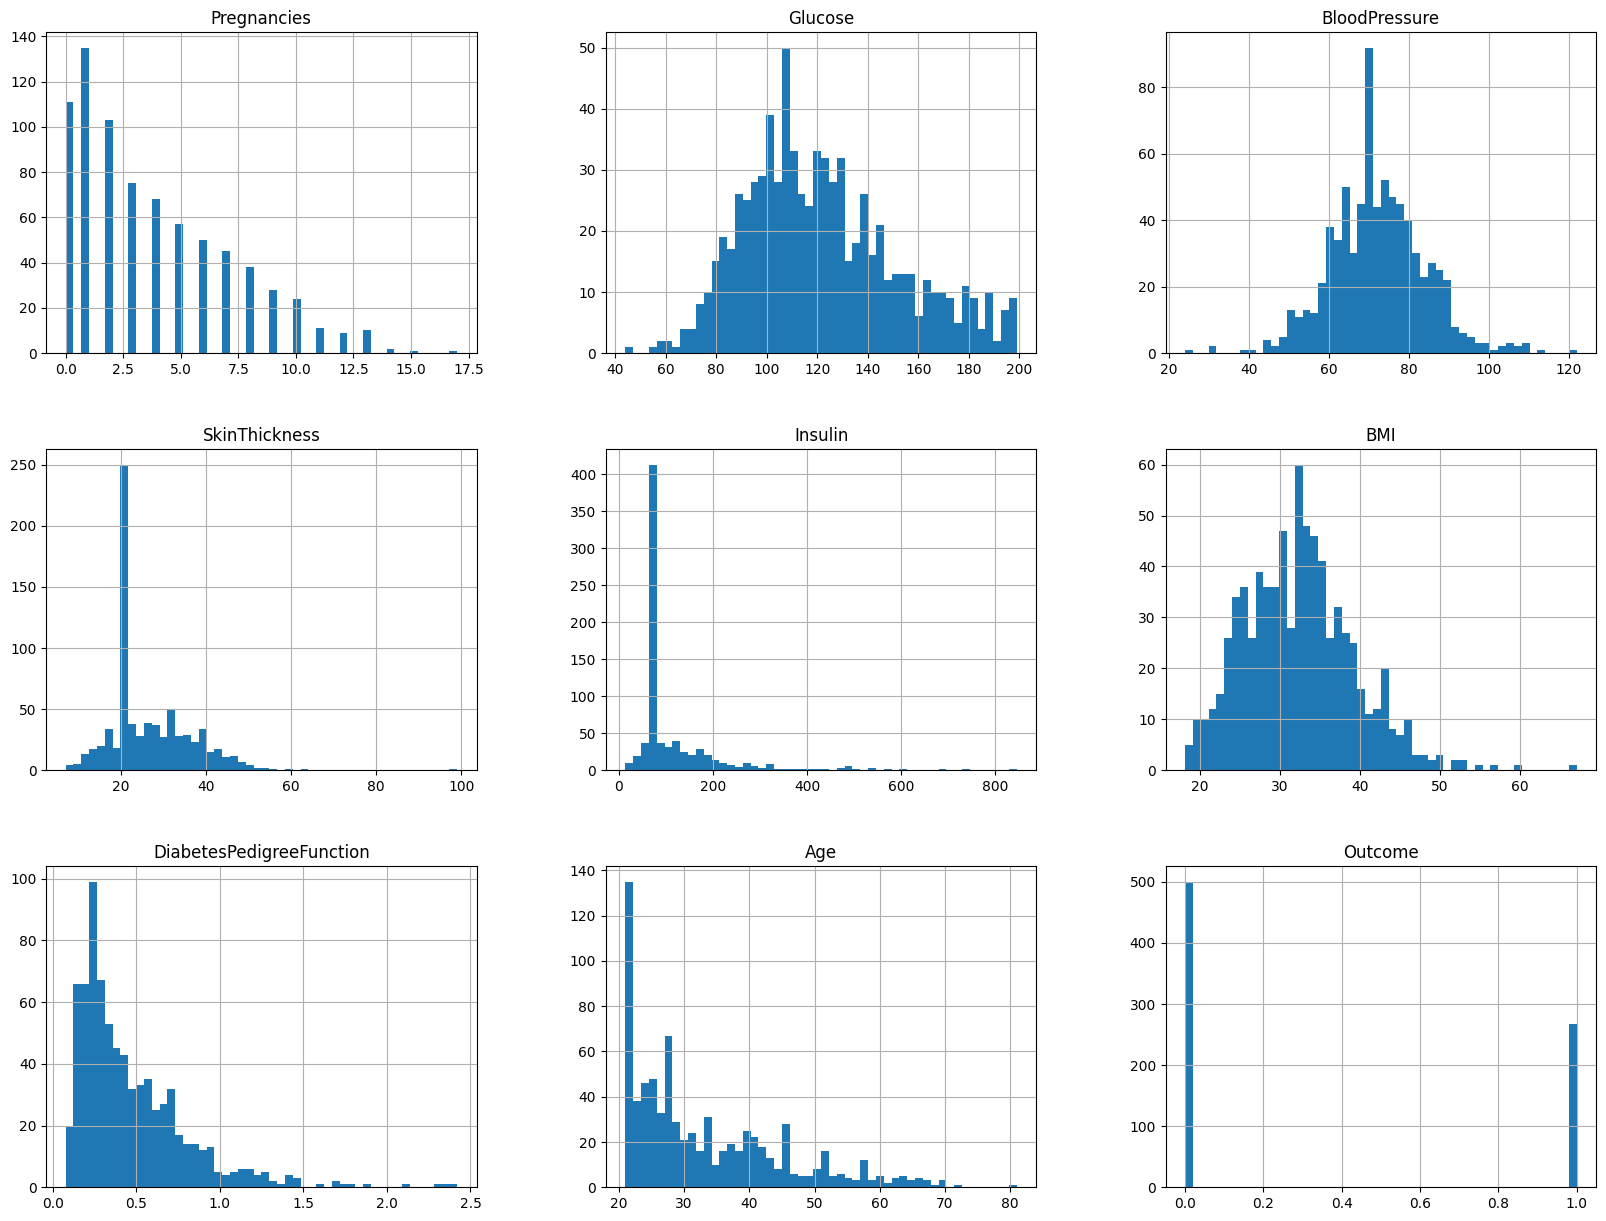

In [24]:
df.hist(bins=50, figsize=(20,15));

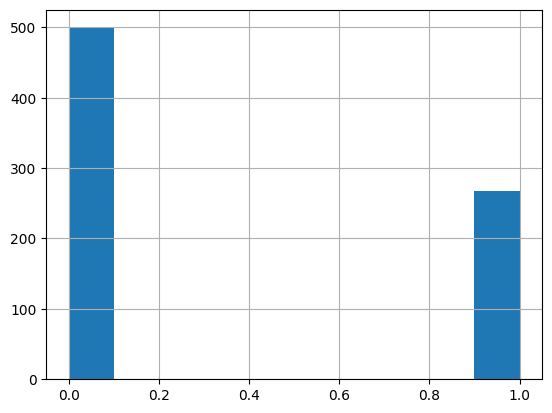

In [27]:
df['Outcome'].hist();

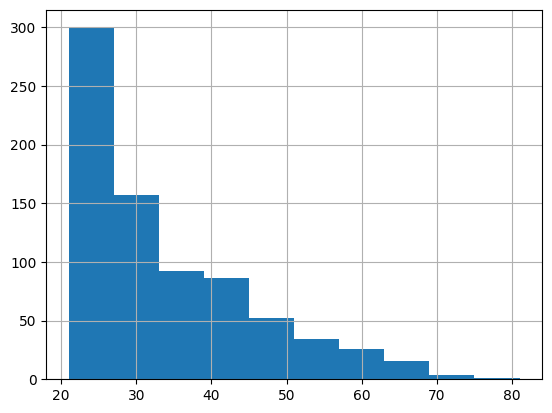

In [26]:
# Data distribution of Age variable
df['Age'].hist();

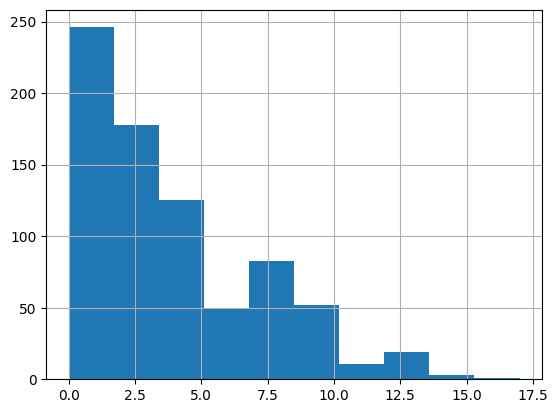

In [28]:
# Data distribution of Pregnancies variable
df['Pregnancies'].hist();

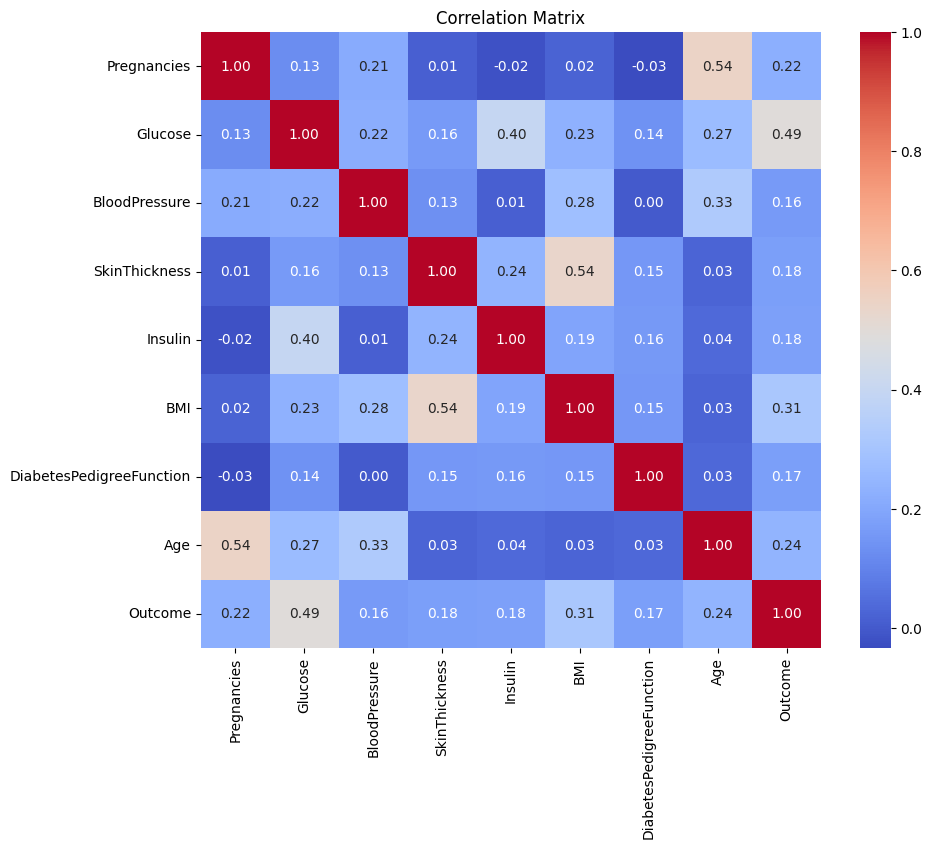

In [29]:
#CO RELATION MATRIX
correlation = df.corr()
#Visualizing the correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

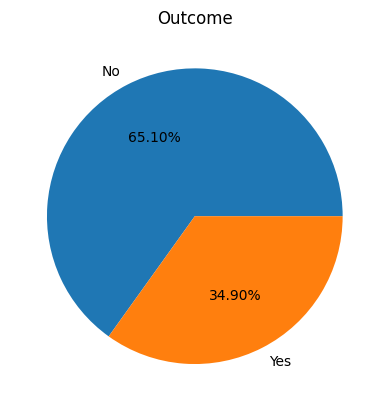

In [30]:
plt.title('Outcome')
plt.pie(df['Outcome'].value_counts(),labels=['No','Yes'], autopct='%1.2f%%')
plt.show()

### TRAIN-TEST SPLIT

In [32]:
#TRAINING THE MODEL WITH THE HELP OF TRAIN TEST SPLIT
x= df.drop("Outcome" ,axis=1)
y= df['Outcome']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### MODEL EVALUATION

In [37]:
#train the model
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [38]:
# making prediction
prediction = model.predict(x_test)
print(prediction)

[1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1
 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 1]


In [39]:
accuracy = accuracy_score(prediction,y_test)
print(accuracy)

0.8181818181818182
